In [2]:
train_file=f'./malaria/training.csv'
test_file = './malaria/test.csv'
image_path = './malaria/images/'

In [15]:
# pip install torch
# !pip install torchvision

In [6]:
from torch.utils.data import Dataset
from PIL import Image

class MalariaDataset(Dataset):
    def __init__(self, data, image_path, is_train=True):
        self.data = data
        self.image_path = image_path
        self.is_train = is_train

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_path, self.data.iloc[idx]['path'])
        image = Image.open(img_path).convert("RGB")

        # You can add additional processing here if needed

        if self.is_train:
            # Load additional information for training
            # For example, loading masks or other annotations
            mask = self.load_mask(idx)
            return {'image': image, 'mask': mask}
        else:
            return {'image': image}

    def load_mask(self, idx):
        # Implement mask loading logic here
        pass

    def image_reference(self, path):
        return path

train_dataset = MalariaDataset(train_file, image_path='./malaria/images/', is_train=True)
test_dataset = MalariaDataset(test_file, image_path='./malaria/images/', is_train=False)



In [8]:
#  train set
train_set = MalariaDataset(train_file,image_path)
train_set.load_malaria(bbox_train, is_train=True)
train_set.prepare()
print('Image Count: {}'.format(len(train_set.image_ids)))
print('Class Count: {}'.format(train_set.num_classes))
for i, info in enumerate(train_set.class_info):
    print('{:3}. {:50}'.format(i, info['name']))

AttributeError: 'MalariaDataset' object has no attribute 'load_malaria'

In [13]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image

# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess an image
image = Image.open('./ImageMal.jpg')
image_tensor = F.to_tensor(image).unsqueeze(0)

# Make predictions
with torch.no_grad():
    predictions = model(image_tensor)

# Extract bounding boxes and labels
boxes = predictions[0]['boxes'].numpy()
labels = predictions[0]['labels'].numpy()

# Visualize bounding boxes on the image (you can use matplotlib for this)
# ...

# Now, you have the bounding boxes and labels for each object in the image.


/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


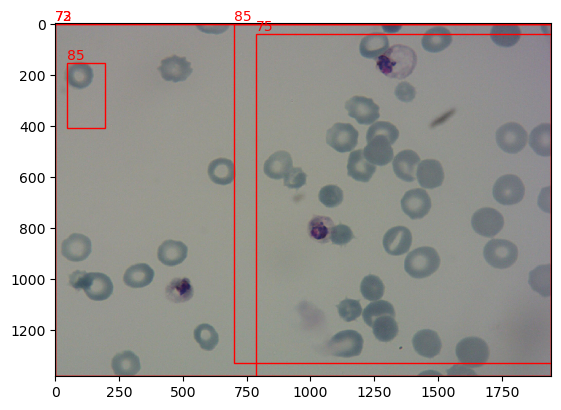

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Add bounding boxes and labels to the image
for box, label in zip(boxes, labels):
    x, y, width, height = box
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y, label, color='r', verticalalignment='bottom')

# Show the plot
plt.show()